In [1]:
# Python 3.x Utility Functions
# From https://github.com/norvig/pytudes/blob/master/ipynb/Advent 2017.ipynb

import re
import numpy as np
import math
import random
import urllib.request

from collections import Counter, defaultdict, namedtuple, deque, abc, OrderedDict
from functools   import lru_cache
from itertools   import (permutations, combinations, chain, cycle, product, islice, 
                         takewhile, zip_longest, count as count_from)
from heapq       import heappop, heappush

identity = lambda x: x
letters  = 'abcdefghijklmnopqrstuvwxyz'

cat = ''.join

Ø   = frozenset() # Empty set
inf = float('inf')
BIG = 10 ** 999

In [67]:
#Read example
top = []
bottom = []
weight = {}

with open('example.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        print(line)
        

['pbga', '66']
['xhth', '57']
['ebii', '61']
['havc', '66']
['ktlj', '57']
['fwft', '72', ['ktlj', 'cntj', 'xhth']]
['qoyq', '66']
['padx', '45', ['pbga', 'havc', 'qoyq']]
['tknk', '41', ['ugml', 'padx', 'fwft']]
['jptl', '61']
['ugml', '68', ['gyxo', 'ebii', 'jptl']]
['gyxo', '61']
['cntj', '57']


In [118]:
import networkx as nx
import matplotlib.pyplot as plt

In [124]:
G = nx.DiGraph()

In [125]:
G.add_nodes_from([x for x, y in top])
G.add_nodes_from([x for x, y, z in bottom])

In [126]:
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))

In [127]:
G.add_edges_from(edges)

In [128]:
G.out_edges()

OutEdgeView([('padx', 'havc'), ('padx', 'qoyq'), ('padx', 'pbga'), ('tknk', 'fwft'), ('tknk', 'ugml'), ('tknk', 'padx'), ('fwft', 'ktlj'), ('fwft', 'cntj'), ('fwft', 'xhth'), ('ugml', 'jptl'), ('ugml', 'gyxo'), ('ugml', 'ebii')])

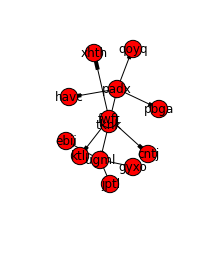

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(G, with_labels=True)


In [133]:
[(x, y) for x, y in G.in_degree if y == 0]

[('tknk', 0)]

In [135]:
#Read input.txt
top = []
bottom = []
weight = {}

with open('input.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        
        

In [136]:
G = nx.DiGraph()
G.add_nodes_from([x for x, y in top])
G.add_nodes_from([x for x, y, z in bottom])
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))
G.add_edges_from(edges)

In [139]:
[(x, y) for x, y in G.in_degree if y == 0]

[('vvsvez', 0)]

## Part 2

In [145]:
#Read example
top = []
bottom = []
weight = {}

with open('example.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        print(line)
        
G = nx.DiGraph()
G.add_nodes_from([x for x, y in top])
G.add_nodes_from([x for x, y, z in bottom])
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))
G.add_edges_from(edges)

['pbga', '66']
['xhth', '57']
['ebii', '61']
['havc', '66']
['ktlj', '57']
['fwft', '72', ['ktlj', 'cntj', 'xhth']]
['qoyq', '66']
['padx', '45', ['pbga', 'havc', 'qoyq']]
['tknk', '41', ['ugml', 'padx', 'fwft']]
['jptl', '61']
['ugml', '68', ['gyxo', 'ebii', 'jptl']]
['gyxo', '61']
['cntj', '57']


In [146]:
[(x, y) for x, y in G.out_degree if y == 0]

[('cntj', 0),
 ('xhth', 0),
 ('gyxo', 0),
 ('havc', 0),
 ('ktlj', 0),
 ('qoyq', 0),
 ('pbga', 0),
 ('ebii', 0),
 ('jptl', 0)]

In [157]:
[x for x  in nx.dfs_predecessors(G,'tknk')]

['cntj',
 'xhth',
 'gyxo',
 'pbga',
 'havc',
 'ktlj',
 'qoyq',
 'padx',
 'ebii',
 'fwft',
 'jptl',
 'ugml']